In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from impedance.models.circuits import CustomCircuit
from impedance import preprocessing

In [ ]:
# Load data from the example EIS result
f, Z = preprocessing.readCSV('exampleData.csv')

# keep only the impedance data in the first quandrant
f, Z = preprocessing.ignoreBelowX(f, Z)

mask = f < 1000
f = f[mask]
Z = Z[mask]

In [ ]:
N = 10

circuit = 'R_0'
initial_guess = [.015]
for i in range(N):
    circuit += f'-p(R_{i % 9 + 1},C_{i % 9 + 1})'
    initial_guess.append(.03/N)
    initial_guess.append(10**(3 - 6*i/N))

meas_model = CustomCircuit(initial_guess=initial_guess, circuit=circuit)

In [ ]:
meas_model.fit(f, Z)

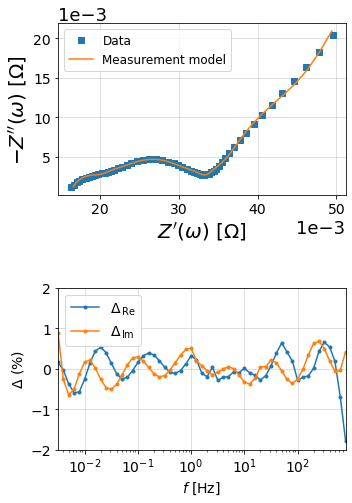

In [ ]:
from impedance.visualization import plot_nyquist, plot_residuals

res_meas_real = (Z - meas_model.predict(f)).real/np.abs(Z)
res_meas_imag = (Z - meas_model.predict(f)).imag/np.abs(Z)

fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(ax1, Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, meas_model.predict(f), fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Measurement model'], loc=2, fontsize=12)

# Plot residuals
plot_residuals(ax2, f, res_meas_real, res_meas_imag, y_limits=(-2,2))

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../../')

from impedance.validation import linKK

In [ ]:
# Load data from the example EIS result
f, Z = preprocessing.readCSV('exampleData.csv')

# keep only the impedance data in the first quandrant
f, Z = preprocessing.ignoreBelowX(f, Z)

mask = f < 1000
f = f[mask]
Z = Z[mask]

In [ ]:
M, mu, Z_linKK, res_real, res_imag = linKK(f, Z, c=.5, max_M=100, fit_type='complex', add_cap=True)

10 1.0 8.144660459080696e-05
20 0.8929547618016153 5.100216828496378e-05


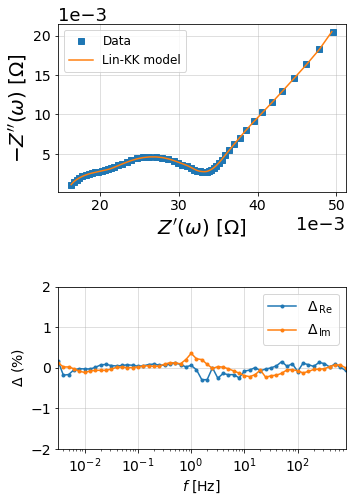

In [ ]:
from impedance.visualization import plot_nyquist, plot_residuals

fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(ax1, Z, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK, fmt='-', scale=1e3, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
plot_residuals(ax2, f, res_real, res_imag, y_limits=(-2,2))

plt.tight_layout()
plt.show()